# FedML

In [22]:
from model import CNN
from server import Server
import numpy as np
import warnings
import matplotlib.pyplot as plt
from utils import *

In [23]:
if __name__ == "__main__":
    warnings.filterwarnings("ignore")

## Experiment 01
In the first experiment we are comparing the accuracy of a fed ml approach including privacy 

In [24]:
# --- TRAINING PARAMETERS ---
# Number of distributed clients participating in the training process.
nr_clients = 3

# Learning Rate
lr = 0.01

# Number of client training epochs.
client_epochs = 10 

# Number of times the server is supposed to perform a global
# update step by aggregating the trained models from the clients.
nr_training_rounds = 20

is_parallel = False

data = "Med"  # or "Med"

# Batch sizes 
if data == "Med":
    batch_size = 10
elif data == "MNIST":
    batch_size = 128
else:
    raise NotImplementedError

In [27]:
# --- DIFFERENTIAL PRIVACY PARAMETERS ---
is_private = False

max_grad_norm = 1.2
epsilon = 5

epsilon_training_iteration = epsilon / nr_training_rounds
# DELTA = 1e-5

virtual_batch_size = 2 * batch_size
assert virtual_batch_size % batch_size == 0  # VIRTUAL_BATCH_SIZE should be divisible by BATCH_SIZE
n_accumulation_steps = int(virtual_batch_size / batch_size)

In [28]:
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private, verbose="server")
test_losses, test_accs = server(early=True, patience=3, delta=0.05)

Round 1, test_loss: 5.0358, test_acc: 0.4583333333333333
Validation loss decreased (inf --> 5.035787).  Saving model ...
Round 2, test_loss: 3.1315, test_acc: 0.5416666666666666
Validation loss decreased (5.035787 --> 3.131544).  Saving model ...
Round 3, test_loss: 1.9352, test_acc: 0.5416666666666666
Validation loss decreased (3.131544 --> 1.935152).  Saving model ...
Round 4, test_loss: 2.2785, test_acc: 0.5416666666666666
EarlyStopping counter: 1 out of 3
Round 5, test_loss: 2.4039, test_acc: 0.4583333333333333
EarlyStopping counter: 2 out of 3
Round 6, test_loss: 1.7422, test_acc: 0.9166666666666666
Validation loss decreased (1.935152 --> 1.742203).  Saving model ...
Round 7, test_loss: 3.4306, test_acc: 0.4583333333333333
EarlyStopping counter: 1 out of 3
Round 8, test_loss: 2.1484, test_acc: 0.4583333333333333
EarlyStopping counter: 2 out of 3
Round 9, test_loss: 2.6301, test_acc: 0.5416666666666666
EarlyStopping counter: 3 out of 3
Early stopping
Test losses: [5.0358, 3.1315, 1

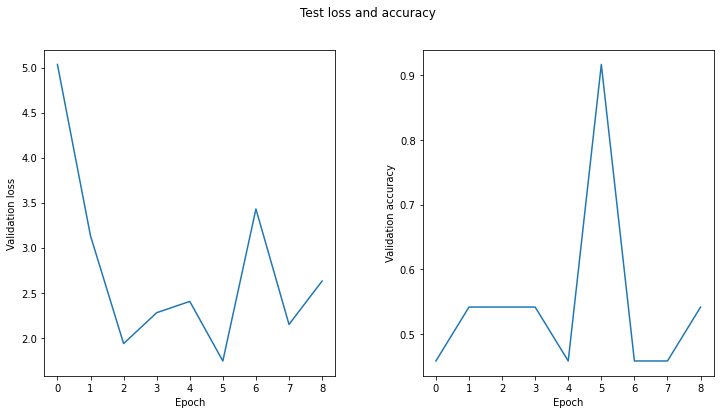

In [29]:
plot_metrics(test_losses, test_accs)

In [17]:
is_private=True
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private, verbose="server")
test_losses, test_accs = server(early=False, patience=3, delta=0.05)

Round 1, test_loss: 2.2344, test_acc: 0.4166666666666667
Round 2, test_loss: 2.2062, test_acc: 0.5833333333333334
Round 3, test_loss: 2.3331, test_acc: 0.5
Round 4, test_loss: 2.8697, test_acc: 0.5
Round 5, test_loss: 2.9860, test_acc: 0.5
Round 6, test_loss: 2.0973, test_acc: 0.5
Round 7, test_loss: 2.8151, test_acc: 0.5
Round 8, test_loss: 2.0177, test_acc: 0.5
Round 9, test_loss: 2.4938, test_acc: 0.5
Round 10, test_loss: 3.0036, test_acc: 0.5
Round 11, test_loss: 3.0084, test_acc: 0.5
Round 12, test_loss: 3.6866, test_acc: 0.5
Round 13, test_loss: 2.8395, test_acc: 0.5
Round 14, test_loss: 2.2914, test_acc: 0.5833333333333334
Round 15, test_loss: 2.7186, test_acc: 0.5
Round 16, test_loss: 2.8734, test_acc: 0.5
Round 17, test_loss: 2.2610, test_acc: 0.5
Round 18, test_loss: 2.2101, test_acc: 0.4166666666666667
Round 19, test_loss: 2.2359, test_acc: 0.4166666666666667
Round 20, test_loss: 2.1434, test_acc: 0.5833333333333334
Test losses: [2.2344, 2.2062, 2.3331, 2.8697, 2.986, 2.0973

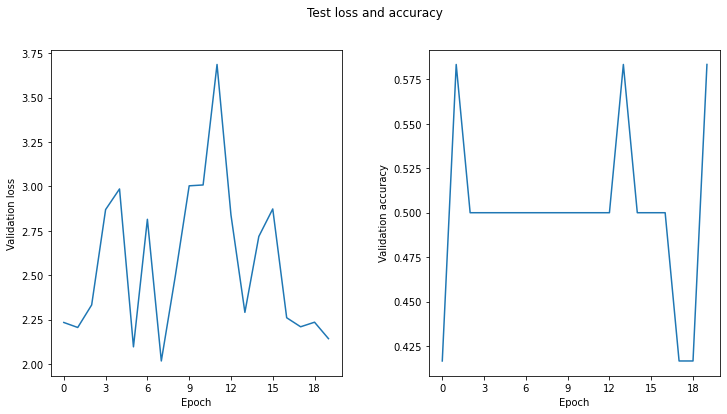

In [18]:
plot_metrics(test_losses, test_accs)

## Experiment 02